In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('nvidia_holder_analysis_full_dataset_20230828.csv')
df.head()

,Unnamed: 0,lionshares_ticker,hldr_name,position_mv,DATE,style,fund_family,ticker,aum,weight_in_nvda,...,Total+Return,Contribution+To Return,Port.+Ending+Market+Value,Bench.+Total+Return,Bench.+Total+Return+( Local ),Bench.+Contribution+To Return,Bench.+Contribution+to Return+( Local ),Bench.+Ending+Weight,Bench.+Beginning+Weight,port_bench
0,0,ACFOX-US,American Century Focused Dynamic Growth Fund,1.413169e+08,20230731,Generalist,American Century Funds,ACFOX,1.805597e+09,0.078266,...,13.981717,13.981717,1.805173e+09,17.102878,17.102878,17.102878,17.102878,100.000000,100.000000,LION:ACFOX-USBENCH:R.1000G
1,1,ACFOX-US,American Century Focused Dynamic Growth Fund,1.413169e+08,20230731,Generalist,American Century Funds,ACFOX,1.805597e+09,0.078266,...,157.483359,6.233630,1.413169e+08,157.420963,157.420963,4.207451,4.207451,5.288649,2.368783,LION:ACFOX-USBENCH:R.1000G
2,2,ACFOX-US,American Century Focused Dynamic Growth Fund,1.413169e+08,20230731,Generalist,American Century Funds,ACFOX,1.805597e+09,0.078266,...,40.939318,1.470025,6.174208e+07,40.939356,40.939356,0.209669,0.209669,0.539620,0.410782,LION:ACFOX-USBENCH:R.1000G
3,3,ACFOX-US,American Century Focused Dynamic Growth Fund,1.413169e+08,20230731,Generalist,American Century Funds,ACFOX,1.805597e+09,0.078266,...,27.543855,1.232681,6.451353e+07,27.543934,27.543934,0.019312,0.019312,0.024891,0.047667,LION:ACFOX-USBENCH:R.1000G
4,4,ACFOX-US,American Century Focused Dynamic Growth Fund,1.413169e+08,20230731,Generalist,American Century Funds,ACFOX,1.805597e+09,0.078266,...,14.120382,1.162294,1.566359e+08,14.120411,14.120411,0.291224,0.291224,3.265130,3.018963,LION:ACFOX-USBENCH:R.1000G


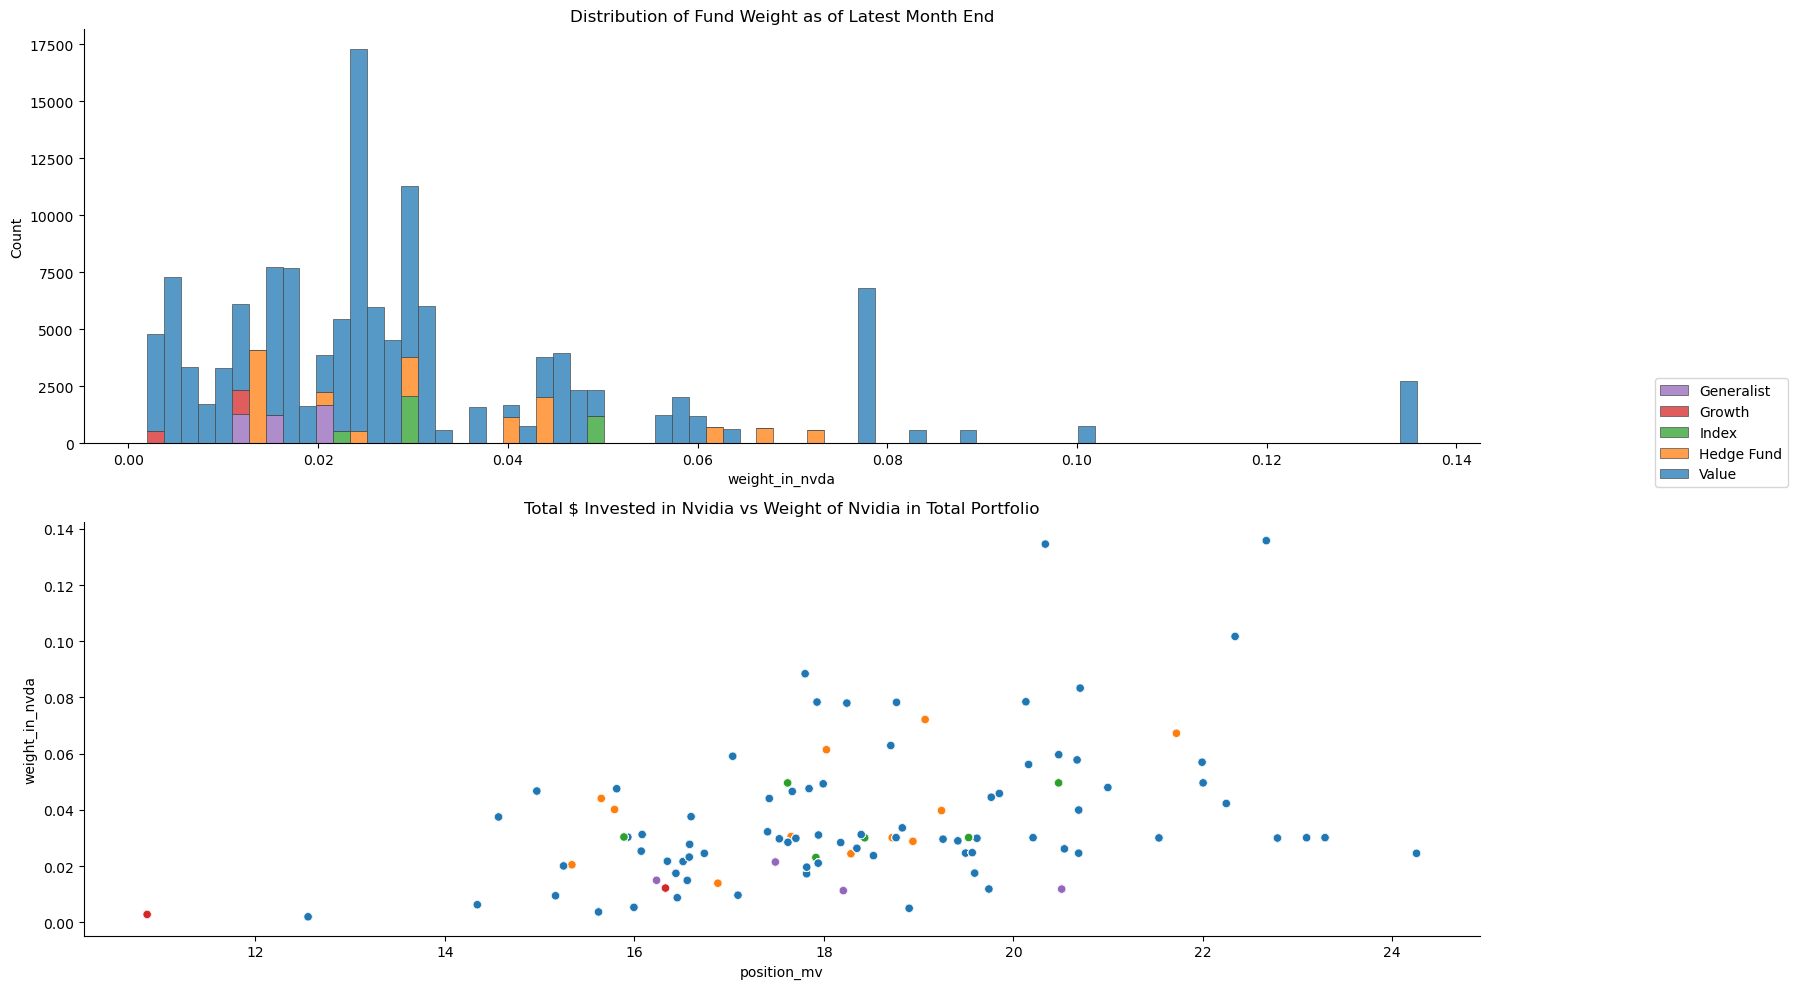

In [23]:
import numpy as np
fig, axs= plt.subplots(2,1,figsize=(15, 10))
sns.despine(fig)
sns.histplot(
    df,
    x="weight_in_nvda", hue="style",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    ax= axs[0],
    legend=False,
    bins = 75
)
axs[0].set_title('Distribution of Fund Weight as of Latest Month End')


sns.scatterplot(
    df,
    x=np.log(df["position_mv"]),
    y='weight_in_nvda',
    hue="style",
    ax= axs[1],
    legend= False
)
axs[1].set_title('Total $ Invested in Nvidia vs Weight of Nvidia in Total Portfolio')




fig.legend(labels=list(df['style'].unique()),
                    loc = 'lower right',
                    bbox_to_anchor=(1.2, .5),)
plt.tight_layout()

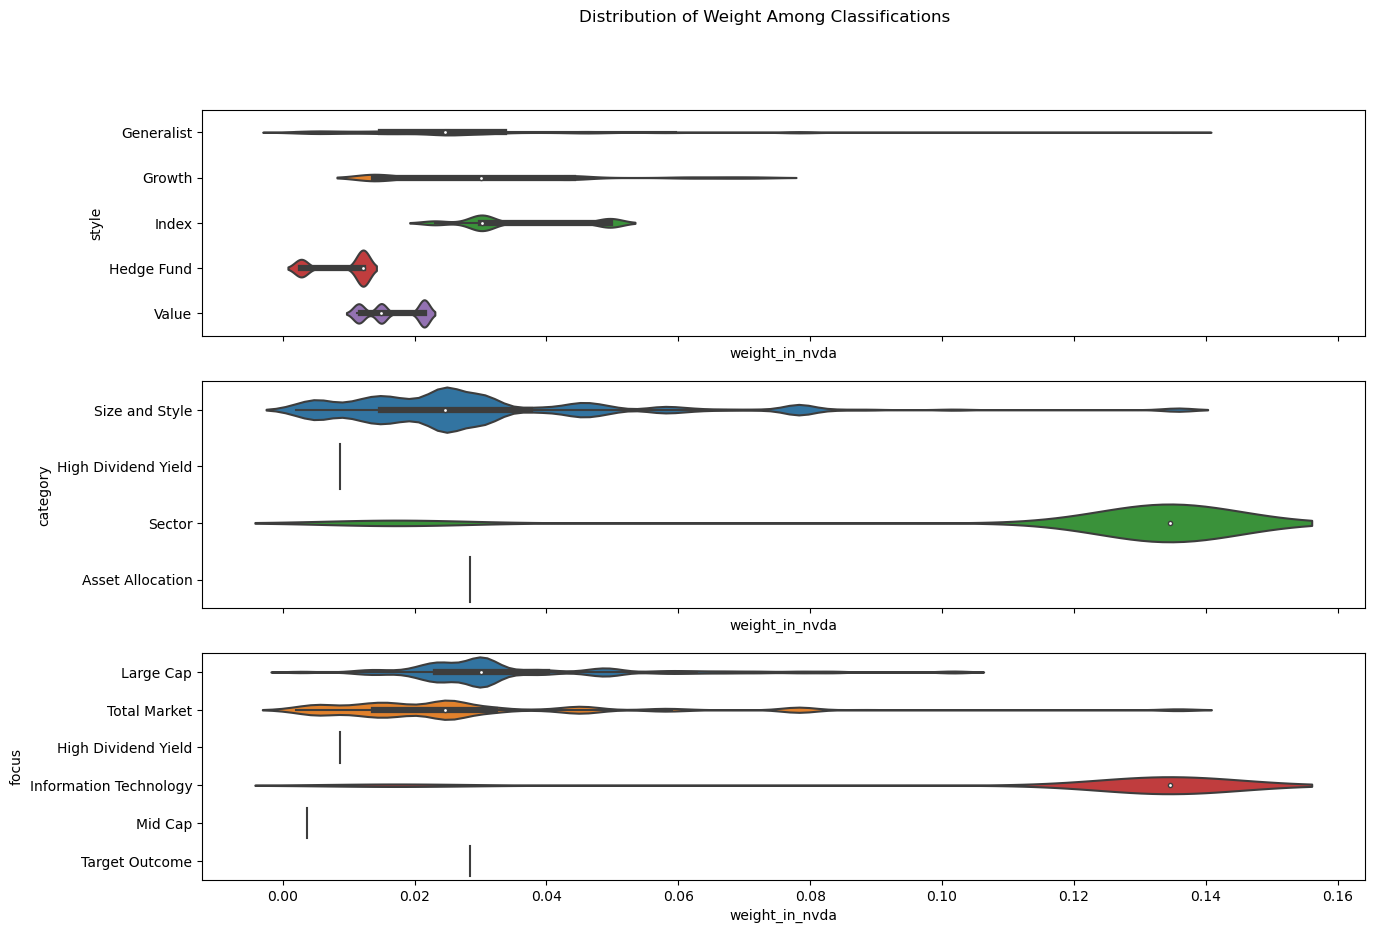

In [25]:
fig,axs= plt.subplots(3,1,figsize =(15,10),sharex=True)

sns.violinplot(data=df, y="style", x="weight_in_nvda",orient = 'h',ax = axs[0])

sns.violinplot(data=df, y="category", x="weight_in_nvda",orient = 'h',ax = axs[1])

sns.violinplot(data=df, y="focus", x="weight_in_nvda",orient = 'h',ax = axs[2])

plt.suptitle('Distribution of Weight Among Classifications')
plt.show()

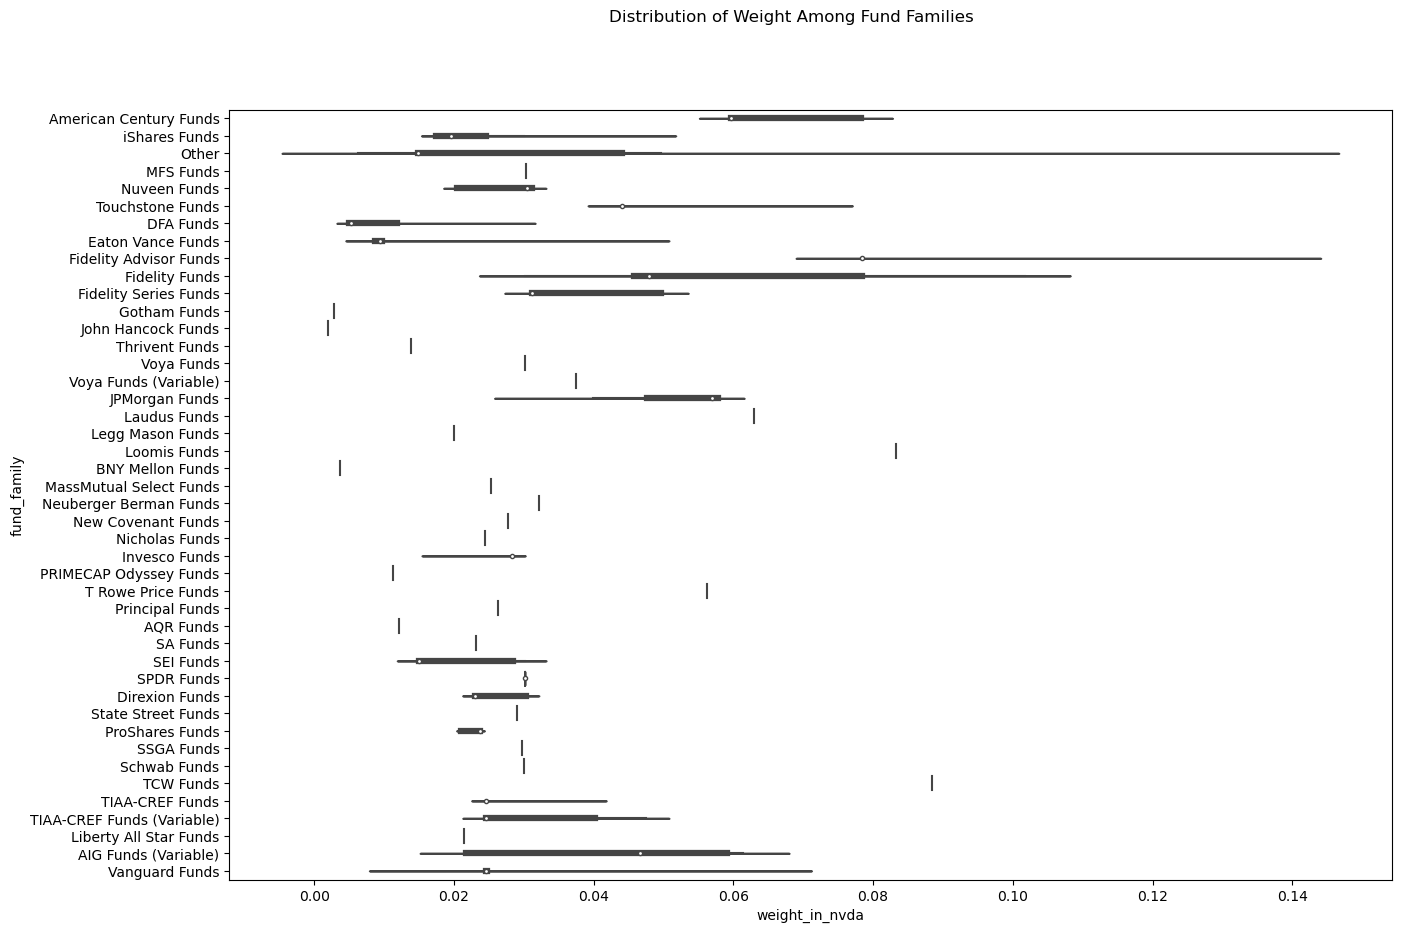

In [62]:
fig,ax = plt.subplots(figsize = (15,10))
sns.violinplot(data=df, y="fund_family", x="weight_in_nvda",orient = 'h')
plt.suptitle('Distribution of Weight Among Fund Families')
plt.show()

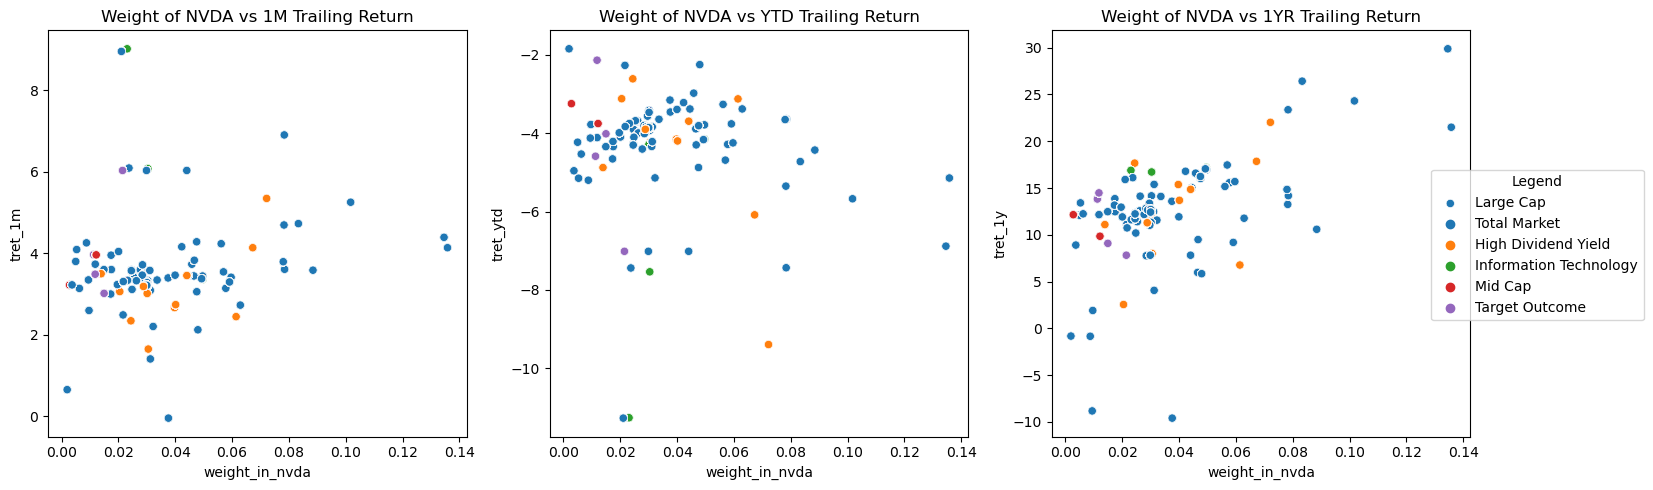

In [36]:
fig,axs= plt.subplots(1,3,figsize =(15,5))

sns.scatterplot(data= df,y='tret_1m',x ='weight_in_nvda',ax = axs[0],hue = 'style')
axs[0].set_title('Weight of NVDA vs 1M Trailing Return')

sns.scatterplot(data= df,y='tret_ytd',x ='weight_in_nvda',ax = axs[1],hue = 'style')
axs[1].set_title('Weight of NVDA vs YTD Trailing Return')

sns.scatterplot(data= df,y='tret_1y',x ='weight_in_nvda',ax = axs[2],hue='style')
axs[2].set_title('Weight of NVDA vs 1YR Trailing Return')

fig.legend(labels=list(df['focus'].unique()),   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Legend", # Title for the legend,
           bbox_to_anchor=(1.1, 0.5),
           )
# turn off the legend of each subplot
for ax in axs:
    ax.legend().set_visible(False)

plt.tight_layout()

In [41]:
df['Active Beginning Weight'] = df['Port.+Beginning+Weight'] - df['Bench.+Beginning+Weight']
df['Active Ending Weight'] = df['Port.+Ending+Weight'] - df['Bench.+Ending+Weight']


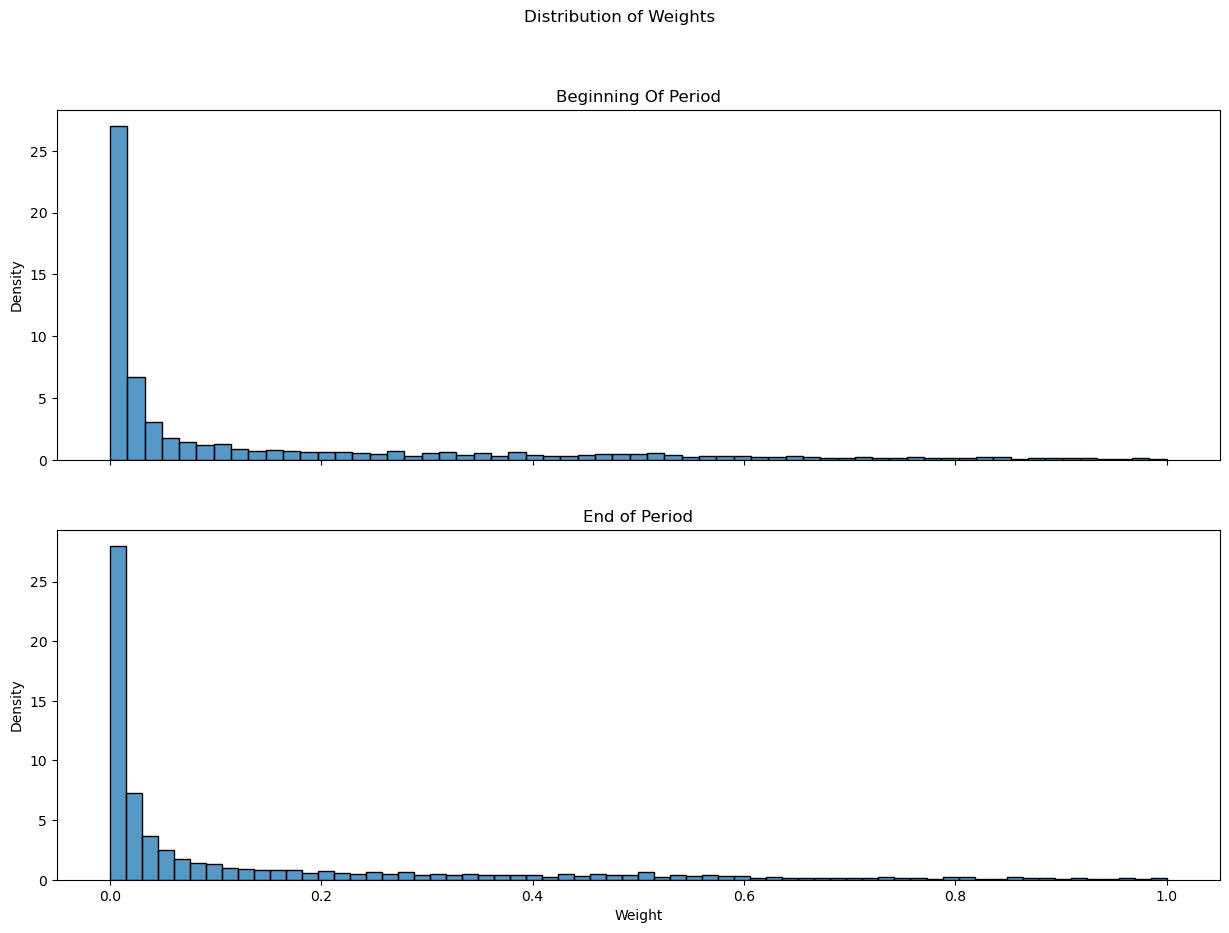

In [64]:
fig,axs = plt.subplots(2,1,figsize = (15,10),sharex=True)
sns.histplot(data = df,x = 'Active Beginning Weight',ax=axs[0],binrange= [0,1],stat = 'density')
axs[0].set_title('Beginning Of Period')
sns.histplot(data = df,x = 'Active Ending Weight',ax=axs[1],binrange= [0,1],stat = 'density')
axs[1].set_title('End of Period')
axs[1].set_xlabel('Weight')

plt.suptitle('Distribution of Weights')
plt.show()

In [68]:
df_g = df.groupby('fund_family').agg({'position_mv':'sum',
                            'Contribution+To Return':'mean',
                            'Active Beginning Weight':'mean',
                            'Active Ending Weight':'mean'})

df_g = df_g.sort_values('position_mv',ascending=False)

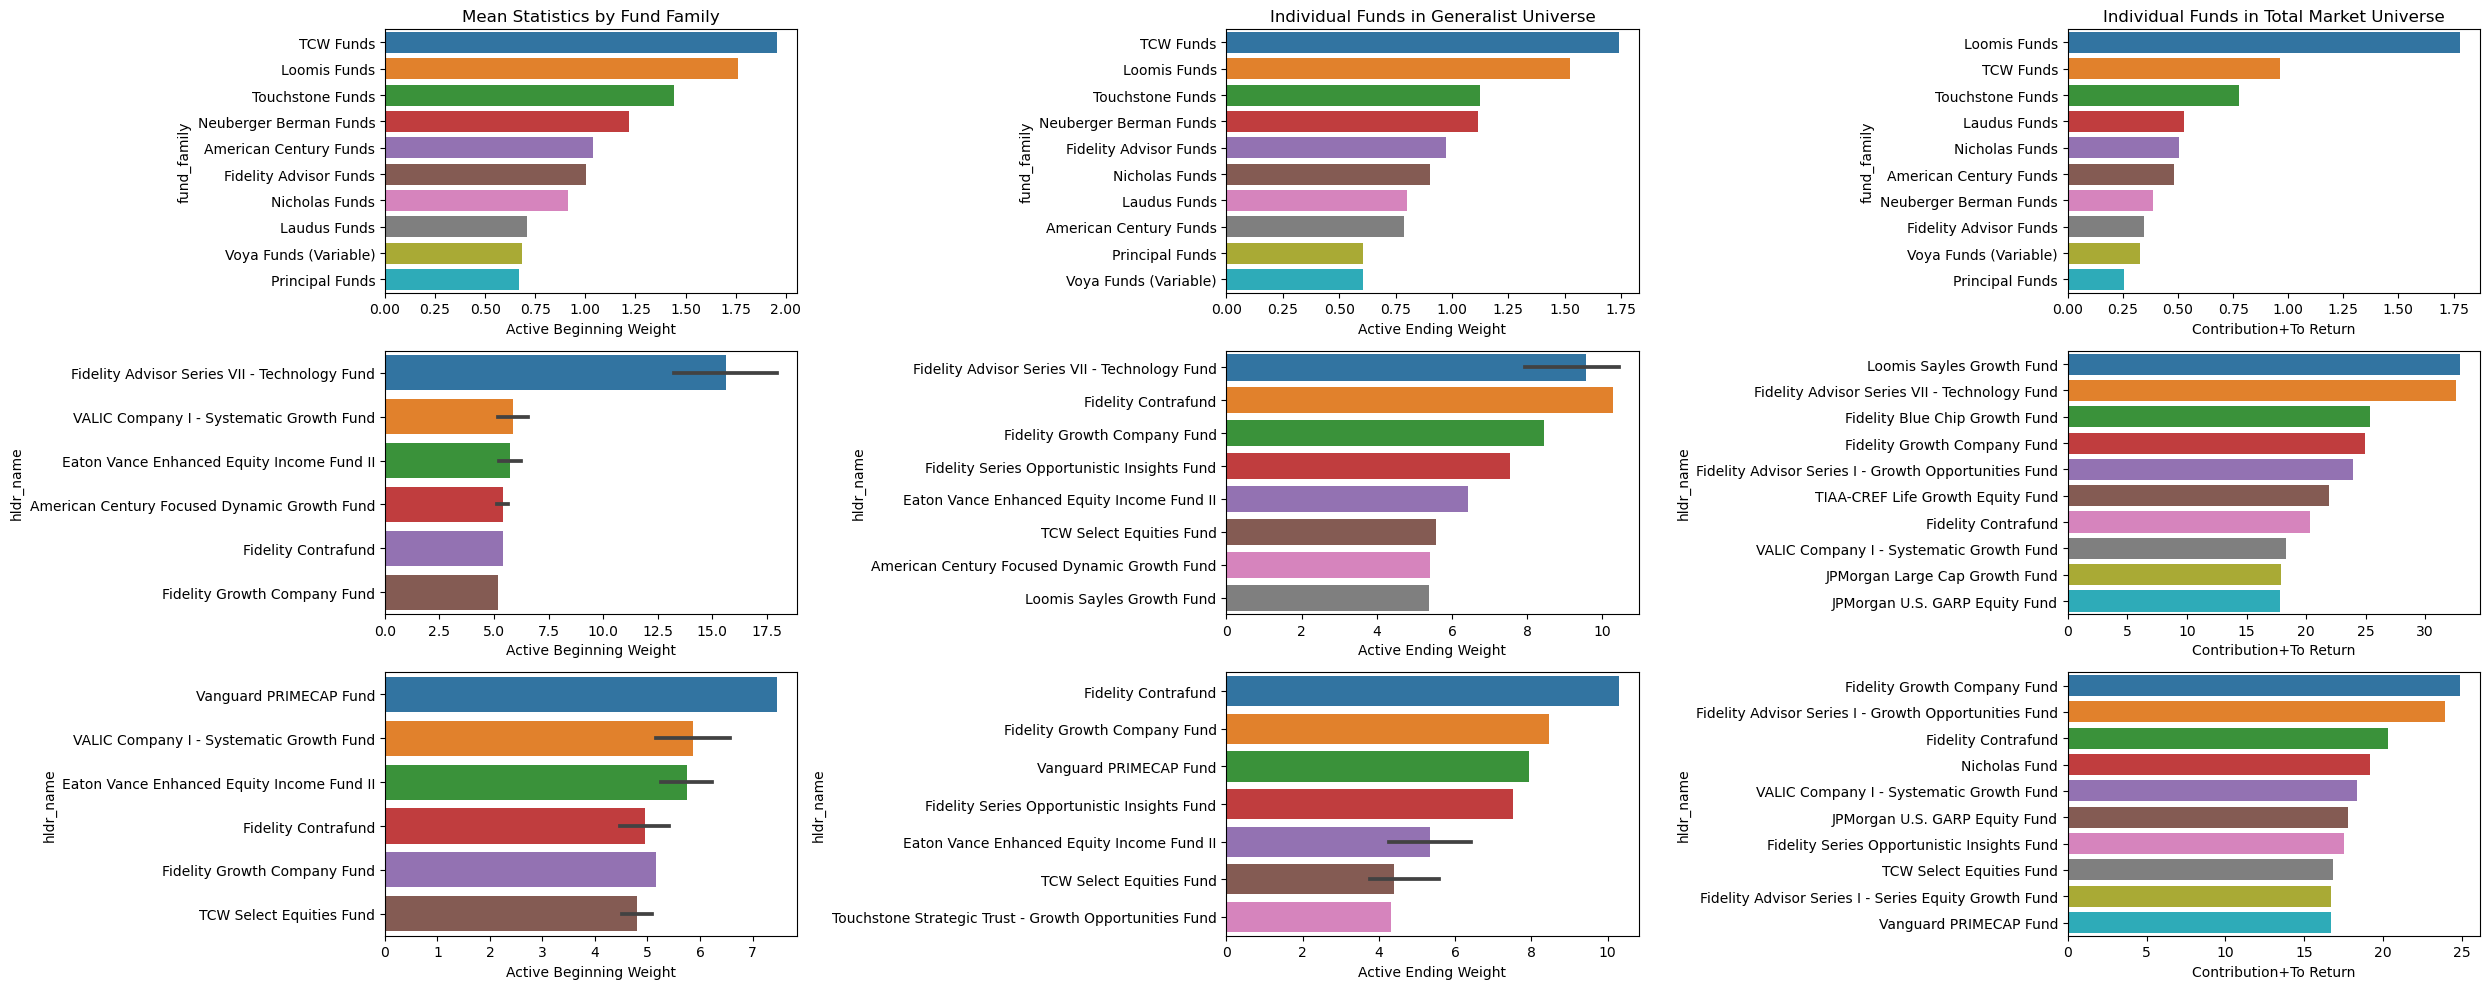

In [123]:
fig,axs = plt.subplots(3,3,figsize = (25,10))
sns.barplot(data = df_g.sort_values('Active Beginning Weight',ascending=False).head(10).reset_index(),x = 'Active Beginning Weight',y = 'fund_family',ax = axs[0,0],orient='h')

sns.barplot(data = df_g.sort_values('Active Ending Weight',ascending=False).head(10).reset_index(),x = 'Active Ending Weight',y = 'fund_family',ax = axs[0,1],orient='h')

sns.barplot(data = df_g.sort_values('Contribution+To Return',ascending=False).head(10).reset_index(),x= 'Contribution+To Return',y = 'fund_family',ax = axs[0,2],orient='h')

df_gen = df[df['style']=='Generalist']
sns.barplot(data = df_gen.sort_values('Active Beginning Weight',ascending=False).head(10).reset_index(),x = 'Active Beginning Weight',y = 'hldr_name',ax = axs[1,0],orient='h')

sns.barplot(data = df_gen.sort_values('Active Ending Weight',ascending=False).head(10).reset_index(),x = 'Active Ending Weight',y = 'hldr_name',ax = axs[1,1],orient='h')

sns.barplot(data = df_gen.sort_values('Contribution+To Return',ascending=False).head(10).reset_index(),x= 'Contribution+To Return',y = 'hldr_name',ax = axs[1,2],orient='h')


df_tm = df[df['focus']=='Total Market']
sns.barplot(data = df_tm.sort_values('Active Beginning Weight',ascending=False).head(10).reset_index(),x = 'Active Beginning Weight',y = 'hldr_name',ax = axs[2,0],orient='h')

sns.barplot(data = df_tm.sort_values('Active Ending Weight',ascending=False).head(10).reset_index(),x = 'Active Ending Weight',y = 'hldr_name',ax = axs[2,1],orient='h')

sns.barplot(data = df_tm.sort_values('Contribution+To Return',ascending=False).head(10).reset_index(),x= 'Contribution+To Return',y = 'hldr_name',ax = axs[2,2],orient='h')

for ax, title in zip(axs[0], ['Mean Statistics by Fund Family','Individual Funds in Generalist Universe','Individual Funds in Total Market Universe']):
    ax.set_title(title)

plt.tight_layout()